# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

(a) Usando `Simpy`, declara las funciones:

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


<div class="alert alert-info">
    
Declaramos Y,Z,W y G como funciones y a X como variable
</div>


In [16]:
y=Function('y')
z=Function('z')
X=symbols('x')
w=Function('w')
g=Function('g')


<div class="alert alert-info">
    
Hacemos las igualdades (Eq) para ver las funciones
</div>

In [17]:
yx=Eq(y(x),cos(x))
yx

Eq(y(x), cos(x))

In [18]:
zx=Eq(z(x),sin(x))
zx

Eq(z(x), sin(x))

In [19]:
wx=Eq(w(x),1/((sin(x))+cos(2*x)))
wx

Eq(w(x), 1/(sin(x) + cos(2*x)))

In [149]:
gx=Eq(g(x),yx.rhs*zx.rhs)
gx

Eq(g(x), sin(x)*cos(x))

<div class="alert alert-info">
    
Usamos **.lhs** para usar el lado izquierdo de las funciones definidas antes.
</div>

(b) Obtén la derivada de $g(x)$

In [21]:
dergx=Eq(diff(g(x)),diff(cos(x)*sin(x)))
dergx

Eq(Derivative(g(x), x), -sin(x)**2 + cos(x)**2)

(c) Grafica $w(x)$ en el rango $[0,1]$

Text(0, 0.5, 'W(x)')

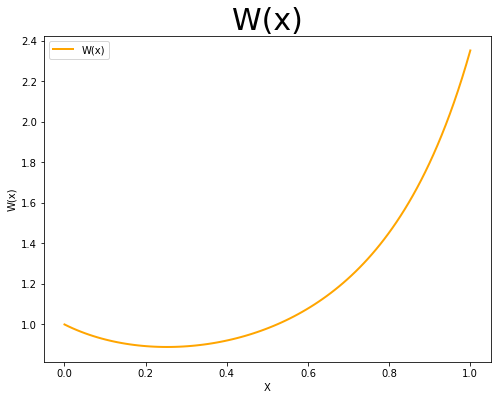

In [109]:
x1=np.linspace(0,1,100)
y1=1/((np.sin(x1))+np.cos(2*x1))
plt.figure(figsize=(8,6))
plt.plot(x1,y1,color="Orange",linewidth=2,label="W(x)")
plt.title("W(x)",fontsize=30)
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('W(x)')

(d) Integra de manera indefinida $g(x)$ y luego evalúala desde $0$ a $1$.

In [57]:
integex=Eq(integrate(g(x)),integrate(sin(x)*cos(x)))
integex

Eq(Integral(g(x), x), sin(x)**2/2)

In [55]:
integex1=Eq(integrate(g(x),(x,0,1)),integrate(sin(x)*cos(x),(x,0,1)))
integex1

Eq(Integral(g(x), (x, 0, 1)), sin(1)**2/2)

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [151]:
limit?


<div class="alert alert-success">
    Si ponia con el "Eq" para darle más presentacion, salia que lo evaluaba en 0, por eso usé print
</div>

In [145]:
print("limite de y(x) cuando x tiende a 0 = ",limit(yx.rhs,x,0))


limite de y(x) cuando x tiende a 0 =  1


In [148]:
print("limite de z(x) cuando x tiende a 0 = ",limit(zx.rhs,x,0))

limite de z(x) cuando x tiende a 0 =  0


In [150]:
print("limite de g(x) cuando x tiende a 0 = ",limit(gx.rhs,x,0))

limite de g(x) cuando x tiende a 0 =  0


In [146]:
print("limite de w(x) cuando x tiende a 0 = ",limit(wx.rhs,x,0))

limite de w(x) cuando x tiende a 0 =  1


(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [36]:
yx.rhs.series(x,0,3)

1 - x**2/2 + O(x**3)

In [37]:
zx.rhs.series(x,0,3)

x + O(x**3)

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>


### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

<div class="alert alert-info">
    
Copiamos primero las condiciones iniciales
</div>
 

In [73]:
a=0.13
b=0.2
c=6.5
N=100000 #Numero de pasos
tiempo_inicial=0 
tiempo_final=100
atro=np.zeros([N,3]) # un arreglo para ir metiendo los respectivos valores de x, y , z
atro[0,0]=0
atro[0,1]=0
atro[0,2]=0
time,dt=np.linspace(tiempo_inicial,tiempo_final,N,retstep=True) #Asi esta definido en 3-ODE

<div class="alert alert-info">
    
Sacado de la clase 3-ODE de la week 6, copiamos la formula de Runge-Kutta 
</div>



In [74]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next




<div class="alert alert-info">
    
Para poder usar la formula RK2, nos falta "derivadas". por eso, definimos la funcion de Atractor de Rossler segun se van dando las derivadas de x , y y z segun el tiempo. 
</div>

In [78]:
def atractor(arreglo,tiempo):
    dx= -(arreglo[1])-arreglo[2]
    dy= arreglo[0] + a*arreglo[1]
    dz= b+ arreglo[2]*(arreglo[0]-c)
    return np.array([dx,dy,dz])


<div class="alert alert-info">
Usamos la funcion RK2, para tener los siguientes variables haciendolo hasta N-1 para no salirnos del rango 
</div>

In [82]:
for i in range(N-1):
    atro[i+1]=RK2(atro[i],time,dt,atractor)

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

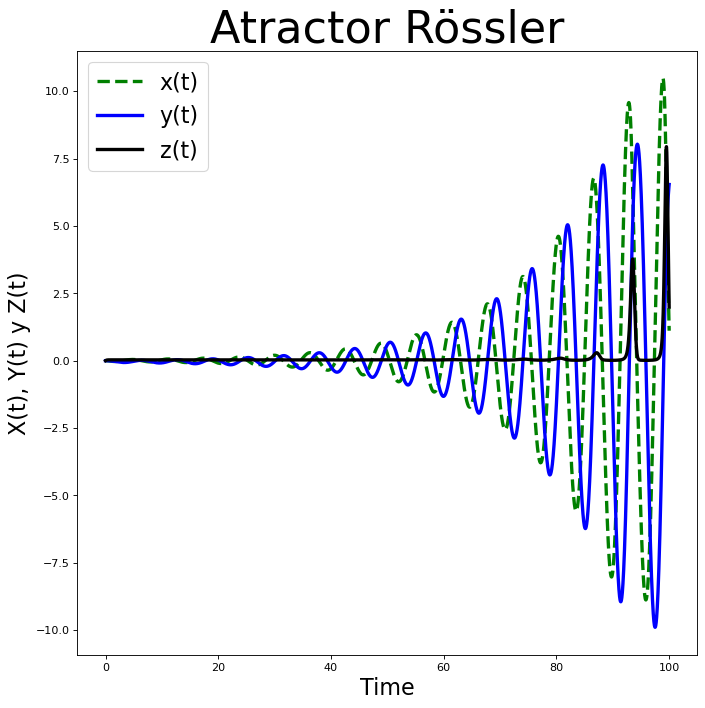

In [128]:
xatro=atro[:,0]
yatro=atro[:,1]
zatro=atro[:,2]

plt.figure(figsize=(10,10),dpi=80)
plt.plot(time,xatro,color="Green",linewidth=3,linestyle='--',label='x(t)')
plt.plot(time,yatro,color="Blue",linewidth=3,label='y(t)')
plt.plot(time,zatro,color="Black",linewidth=3,label='z(t)')
plt.title('Atractor Rössler',fontsize=40)
plt.xlabel('Time',fontsize=20)
plt.ylabel("X(t), Y(t) y Z(t)", fontsize=20)
plt.legend(loc='best',fontsize=20)

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [118]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Atractor de Rössler')

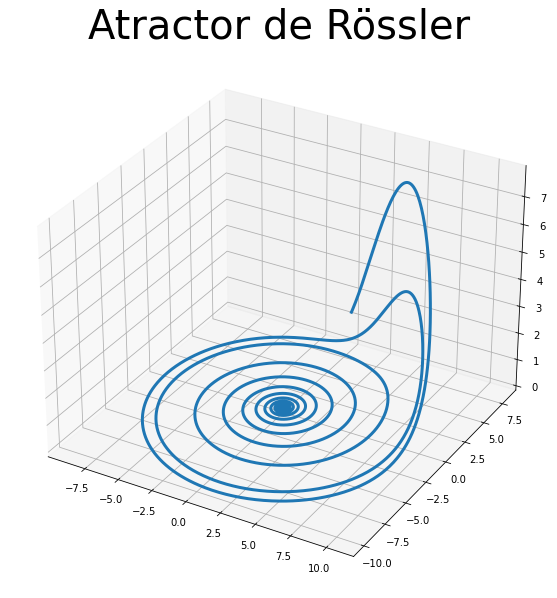

In [153]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(xatro,yatro,zatro,linewidth=3)
plt.title("Atractor de Rössler",fontsize=40)